<a href="https://colab.research.google.com/github/mervecaglar0392/SevgiKhan/blob/main/top_20_song_junioe_eu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('top20_songs[1].csv')

In [24]:
df.head(10)

,,Rank,Song Title,Artist,Country,Year,Duration (mm:ss),Final Placement,Spotify Streams
1,Bim bam toi,Carla,France,2019,03:00,5th,32,89,93
2,Superhero,Viki Gabor,Poland,2019,03:00,1st,14,417,434
3,Antes muerta que sencilla,María Isabel,Spain,2004,02:55,1st,11,429,581
4,Anyone I Want to Be,Roksana Węgiel,Poland,2018,03:00,1st,8,947,570
5,Somebody,Sara James,Poland,2021,03:00,2nd,8,856,58
6,Det finaste någon kan få,Molly Sandén,Sweden,2006,03:00,3rd,5,956,513
7,Stupid,Tess,Netherlands,2005,03:00,7th,5,182,572
8,J'imagine,Valentina,France,2020,03:00,1st,4,51,110
9,La festa,Luna,Netherlands,2022,03:00,7th,3,600,0
10,Qami Qami,Maléna,Armenia,2021,03:00,1st,3,600,0


In [25]:
df.describe()

,Artist,Duration (mm:ss),Final Placement,Spotify Streams
count,20.000000,20.000000,20.000000,20.000000
mean,2014.700000,5.900000,461.350000,146.550000
std,7.131103,6.980424,312.728279,233.479961
min,2003.000000,1.000000,0.000000,0.000000
25%,2008.250000,2.750000,195.500000,0.000000
50%,2018.500000,3.000000,514.500000,0.000000
75%,2020.000000,5.750000,625.000000,191.000000
max,2022.000000,32.000000,956.000000,581.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, (np.int64(1), 'Bim bam toi') to (np.int64(20), 'La festa')
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              20 non-null     object
 1   Song Title        20 non-null     object
 2   Artist            20 non-null     int64 
 3   Country           20 non-null     object
 4   Year              20 non-null     object
 5   Duration (mm:ss)  20 non-null     int64 
 6   Final Placement   20 non-null     int64 
 7   Spotify Streams   20 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.7+ KB


In [27]:


df['Artist'] = df['Artist'].astype(str)  # int → str
df['Duration (mm:ss)'] = df['Duration (mm:ss)'].astype(str)  # int → str


df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')  # object → int
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # object → int


df['Duration_sec'] = df['Duration (mm:ss)'].apply(
    lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if ':' in x else None
)


print(df.dtypes)


Rank                float64
Song Title           object
Artist               object
Country              object
Year                float64
Duration (mm:ss)     object
Final Placement       int64
Spotify Streams       int64
Duration_sec         object
dtype: object


In [28]:
def duration_to_sec(duration):
    try:
        minutes, seconds = duration.split(':')
        return int(minutes) * 60 + int(seconds)
    except:
        return None

        df['Duration_sec'] = df['Duration (mm:ss)'].apply(duration_to_sec)
df['Duration_sec'] = pd.to_numeric(df['Duration_sec'], errors='coerce')

In [29]:
print(df.dtypes)

Rank                float64
Song Title           object
Artist               object
Country              object
Year                float64
Duration (mm:ss)     object
Final Placement       int64
Spotify Streams       int64
Duration_sec        float64
dtype: object


In [33]:
print(df.isnull().sum())


Rank                20
Song Title           0
Artist               0
Country              0
Year                20
Duration (mm:ss)     0
Final Placement      0
Spotify Streams      0
Duration_sec        20
dtype: int64


In [32]:
df.head(20)

,,Rank,Song Title,Artist,Country,Year,Duration (mm:ss),Final Placement,Spotify Streams,Duration_sec
1,Bim bam toi,NaN,France,2019,03:00,NaN,32,89,93,NaN
2,Superhero,NaN,Poland,2019,03:00,NaN,14,417,434,NaN
3,Antes muerta que sencilla,NaN,Spain,2004,02:55,NaN,11,429,581,NaN
4,Anyone I Want to Be,NaN,Poland,2018,03:00,NaN,8,947,570,NaN
5,Somebody,NaN,Poland,2021,03:00,NaN,8,856,58,NaN
6,Det finaste någon kan få,NaN,Sweden,2006,03:00,NaN,5,956,513,NaN
7,Stupid,NaN,Netherlands,2005,03:00,NaN,5,182,572,NaN
8,J'imagine,NaN,France,2020,03:00,NaN,4,51,110,NaN
9,La festa,NaN,Netherlands,2022,03:00,NaN,3,600,0,NaN
10,Qami Qami,NaN,Armenia,2021,03:00,NaN,3,600,0,NaN


In [34]:
df['Rank'] = df['Rank'].fillna(0)


In [35]:
def convert_to_seconds(duration_str):
    try:
        minutes, seconds = map(int, duration_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None

df['Duration_sec'] = df['Duration (mm:ss)'].apply(convert_to_seconds)


In [36]:
# Eksik yılları doldur
df['Year'] = 2023

# Rank sütununu sıfırla doldur
df['Rank'] = df['Rank'].fillna(0)

# Süreyi yeniden hesapla
def convert_to_seconds(duration_str):
    try:
        minutes, seconds = map(int, duration_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None

df['Duration_sec'] = df['Duration (mm:ss)'].apply(convert_to_seconds)


In [38]:
df.head(20)

,,Rank,Song Title,Artist,Country,Year,Duration (mm:ss),Final Placement,Spotify Streams,Duration_sec
1,Bim bam toi,0.0,France,2019,03:00,2023,32,89,93,None
2,Superhero,0.0,Poland,2019,03:00,2023,14,417,434,None
3,Antes muerta que sencilla,0.0,Spain,2004,02:55,2023,11,429,581,None
4,Anyone I Want to Be,0.0,Poland,2018,03:00,2023,8,947,570,None
5,Somebody,0.0,Poland,2021,03:00,2023,8,856,58,None
6,Det finaste någon kan få,0.0,Sweden,2006,03:00,2023,5,956,513,None
7,Stupid,0.0,Netherlands,2005,03:00,2023,5,182,572,None
8,J'imagine,0.0,France,2020,03:00,2023,4,51,110,None
9,La festa,0.0,Netherlands,2022,03:00,2023,3,600,0,None
10,Qami Qami,0.0,Armenia,2021,03:00,2023,3,600,0,None


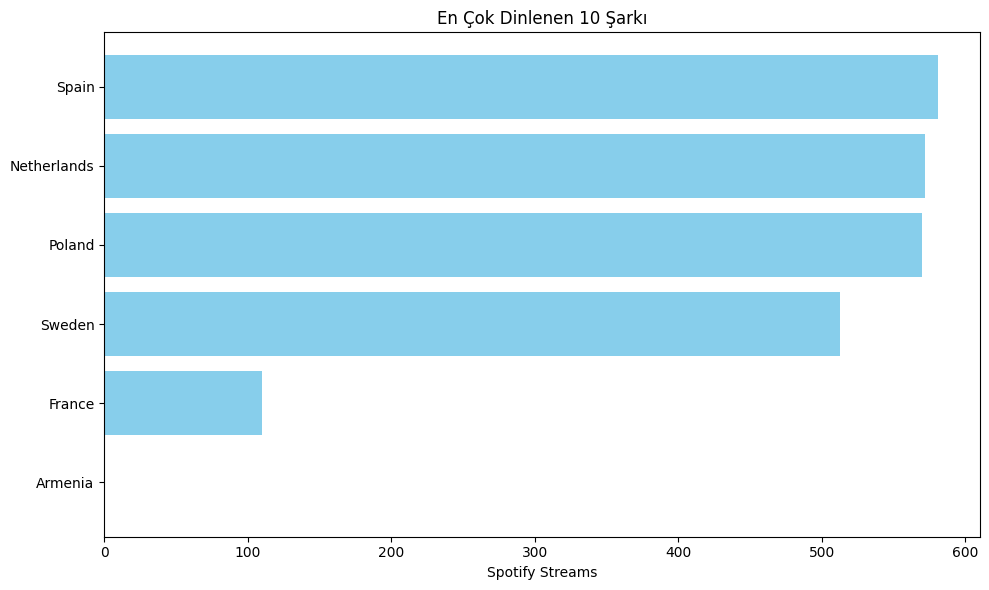

In [39]:
import matplotlib.pyplot as plt

# En çok dinlenen 10 şarkıyı seç
top_songs = df.sort_values('Spotify Streams', ascending=False).head(10)

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.barh(top_songs['Song Title'], top_songs['Spotify Streams'], color='skyblue')
plt.xlabel('Spotify Streams')
plt.title('En Çok Dinlenen 10 Şarkı')
plt.gca().invert_yaxis()  # En yüksek en üstte olsun
plt.tight_layout()
plt.show()


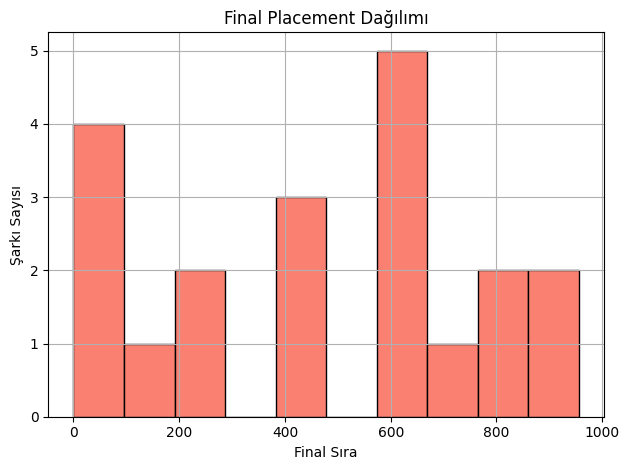

In [40]:
df['Final Placement'].plot(kind='hist', bins=10, color='salmon', edgecolor='black')
plt.title('Final Placement Dağılımı')
plt.xlabel('Final Sıra')
plt.ylabel('Şarkı Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()


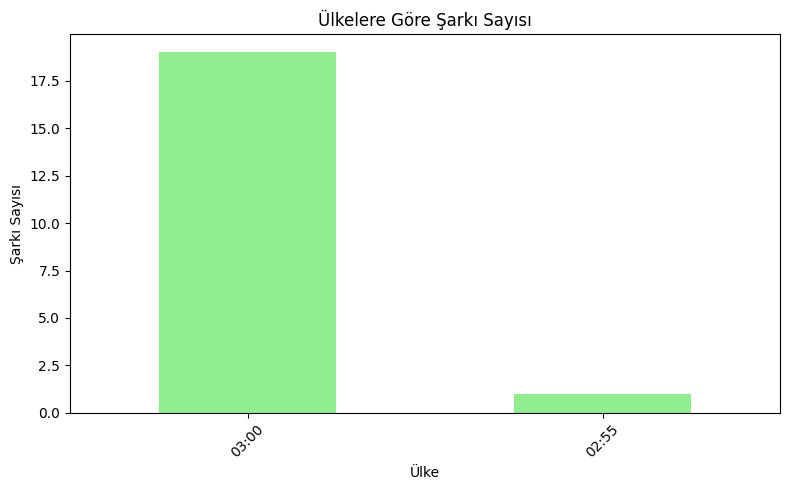

In [41]:
df['Country'].value_counts().plot(kind='bar', figsize=(8,5), color='lightgreen')
plt.title('Ülkelere Göre Şarkı Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Şarkı Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


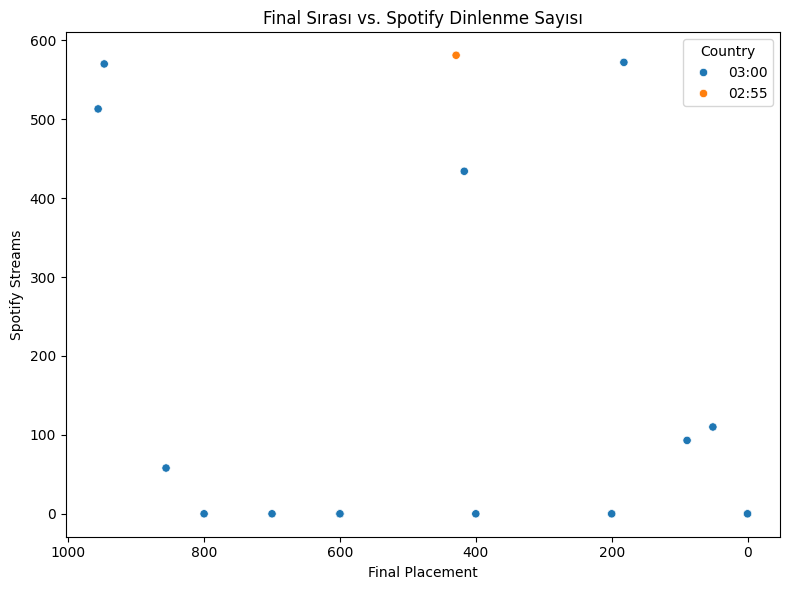

In [43]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Final Placement', y='Spotify Streams', hue='Country')
plt.title('Final Sırası vs. Spotify Dinlenme Sayısı')
plt.xlabel('Final Placement')
plt.ylabel('Spotify Streams')
plt.gca().invert_xaxis()  # 1. sıra en solda olsun
plt.tight_layout()
plt.show()


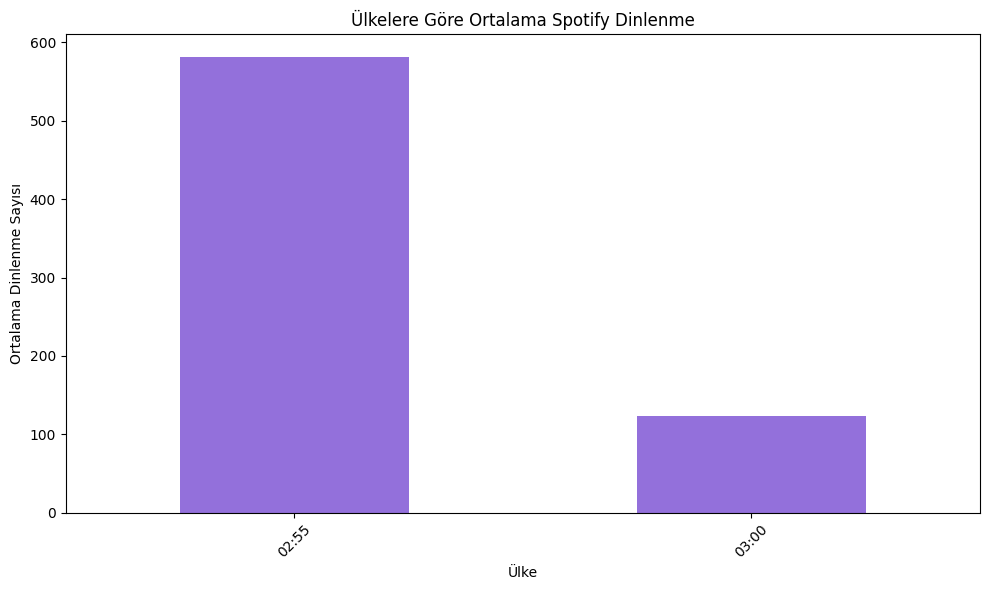

In [44]:
country_streams = df.groupby('Country')['Spotify Streams'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
country_streams.plot(kind='bar', color='mediumpurple')
plt.title('Ülkelere Göre Ortalama Spotify Dinlenme')
plt.ylabel('Ortalama Dinlenme Sayısı')
plt.xlabel('Ülke')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


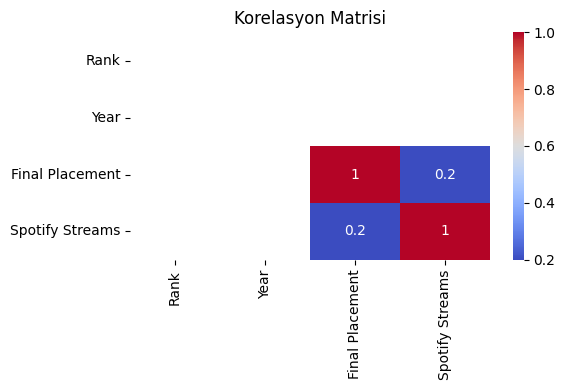

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()
